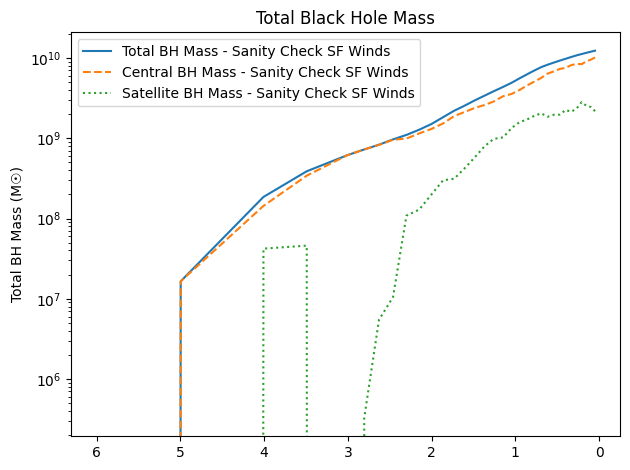

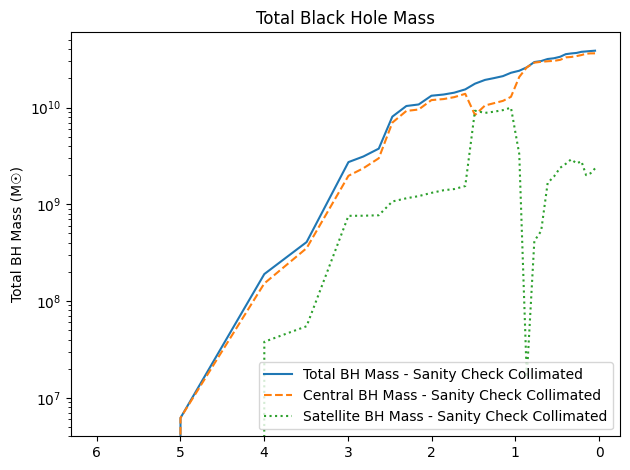

In [64]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def bh_mass_over_snapshots(file_paths_dict):


    for label, file_paths in file_paths_dict.items():
        total_bh_masses = []
        central_bh_masses = []
        satellite_bh_masses = []
        redshifts = []

        for file_path, catalog_path in file_paths:
            with h5py.File(file_path, 'r') as data, h5py.File(catalog_path, 'r') as f:
                redshift = data['Header'].attrs['Redshift'][()]  
                redshifts.append(redshift)

                GroupFirstSub = f['Group/GroupFirstSub'][:]
                SubhaloBHMass = f['Subhalo/SubhaloBHMass'][:] * 1e10 
                GroupBHMass = f['Group/GroupBHMass'][:] * 1e10 

                total_bh_masses.append(np.sum(GroupBHMass))
                central_bh_masses.append(np.sum(SubhaloBHMass[GroupFirstSub.astype(int)]))
                satellite_bh_masses.append(np.sum(GroupBHMass - SubhaloBHMass[GroupFirstSub.astype(int)]))
        
        sorted_indices = np.argsort(redshifts)
        redshifts_sorted = np.array(redshifts)[sorted_indices]
        total_bh_masses_sorted = np.array(total_bh_masses)[sorted_indices]
        central_bh_masses_sorted = np.array(central_bh_masses)[sorted_indices]
        satellite_bh_masses_sorted = np.array(satellite_bh_masses)[sorted_indices]

        plt.plot(redshifts_sorted, total_bh_masses_sorted, label=f'Total BH Mass - {label}')
        plt.plot(redshifts_sorted, central_bh_masses_sorted, '--', label=f'Central BH Mass - {label}')
        plt.plot(redshifts_sorted, satellite_bh_masses_sorted, ':', label=f'Satellite BH Mass - {label}')
    
        plt.ylabel("Total BH Mass (M☉)")
        plt.yscale("log")
        plt.title("Total Black Hole Mass")
        plt.gca().invert_xaxis()
        plt.legend()

        plt.tight_layout()
        plt.show()

file_paths_dict = {
    'Sanity Check SF Winds': [
        (f'SimbaTNG-production/sanity_check_everythin_2phase_SFwinds/snap_{i:03}.hdf5',
         f'SimbaTNG-production/sanity_check_everythin_2phase_SFwinds/fof_subhalo_tab_{i:03}.hdf5')
        for i in range(33)  
    ],
    'Sanity Check Collimated': [
        (f'SimbaTNG-production/sanity_check_collimated/snap_{i:03}.hdf5',
         f'SimbaTNG-production/sanity_check_collimated/fof_subhalo_tab_{i:03}.hdf5')
        for i in range(33) 
    ]
}

bh_mass_over_snapshots(file_paths_dict)
#data/Output-fidTNG_CAMELS
#for one snapshot plot histogram of bh masses per halo 
#for one snapshot plot mass bh for halo bin 
#for both separate based on central or stallight 